# Import Library

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [70]:
df=pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## EDA

In [71]:
df.shape

(614, 13)

In [72]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [73]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [74]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N


## statistics

In [76]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [77]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

dropping the missing value

In [78]:
df=df.dropna()

In [79]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [80]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [81]:
df.shape

(480, 13)

### Lable encoding

(converting loan status categorical value to numrical value)

In [82]:
df.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)
df.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,"No":0},
           'Property_Area':{'Rural':0,"Semiurban":1,"Urban":2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [83]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

replacing all 3+ value to 4

In [84]:
df=df.replace(to_replace="3+",value=4)

In [85]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

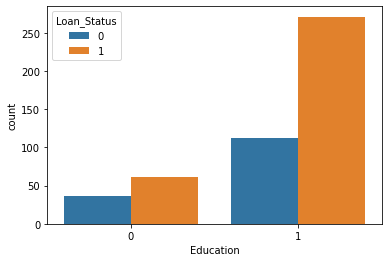

In [86]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

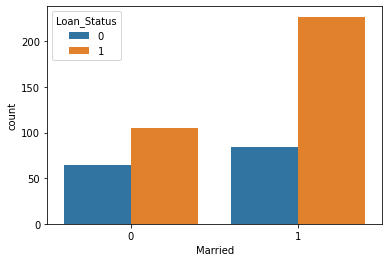

In [87]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

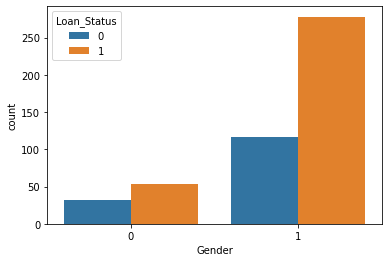

In [88]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

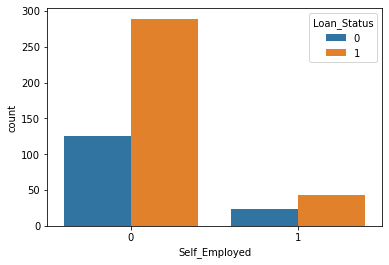

In [89]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In [90]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,-0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,-0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Education,-0.059245,-0.001652,1.000000,0.005085,0.131172,0.074499,0.172780,0.102168,0.056656,0.055005,0.068437
Self_Employed,-0.002761,0.015674,0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390
Property_Area,-0.000204,0.038653,0.055005,-0.050797,-0.053160,0.006540,-0.109685,-0.058656,-0.003013,1.000000,0.031361


seperating data and label

In [91]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [92]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

### Train Test split

In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [94]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [95]:
print(Y.shape,Y_train.shape,Y_test.shape)

(480,) (432,) (48,)


Training Model-Support vector machine model

In [96]:
classifier=svm.SVC(kernel='linear')

In [97]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [99]:
X_train_prediction=classifier.predict(X_train)

In [100]:
traning_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [101]:
print('Accuaracy on training data :',traning_data_accuracy)

Accuaracy on training data : 0.7986111111111112


In [103]:
classifier.fit(X_test,Y_test)
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuaracy on testing data :',testing_data_accuracy)

Accuaracy on testing data : 0.8333333333333334
